# Histograms, Binnings, and Densitys

학습 날짜 : 2019 - 05- 05

아는 것은 skip

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

%matplotlib inline

data = np.random.randn(1000)

(array([  2.,  16.,  53., 151., 220., 269., 186.,  77.,  21.,   5.]),
 array([-3.44473428, -2.78197111, -2.11920794, -1.45644477, -0.7936816 ,
        -0.13091843,  0.53184474,  1.19460791,  1.85737108,  2.52013425,
         3.18289742]),
 <a list of 10 Patch objects>)

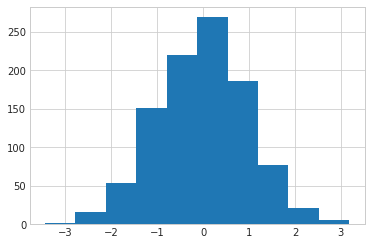

In [4]:
plt.hist(data)

hist()는 다양한 조정옵션을 가지고 있다.

matplotlib 패키지의 hist 함수는 다음과 같은 3개의 값을 반환한다.

> n : 각 구간에 포함된 값의 갯수 혹은 빈도 리스트

> bins : 구간의 경계값 리스트

> patches : 각 구간을 그리는 matplotlib patch 객체 리스트

https://datascienceschool.net/view-notebook/69b85ec9afb7415d8da4c8cd5e46d22e/

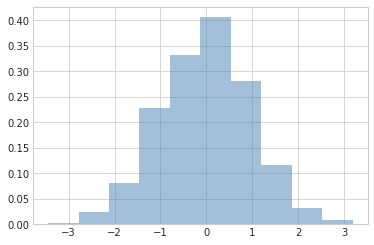

In [7]:
plt.hist(
    data,
    bins=10, 
    normed=True, 
    alpha=0.5,
    histtype='stepfilled', 
    color='steelblue',
    edgecolor='none'
);

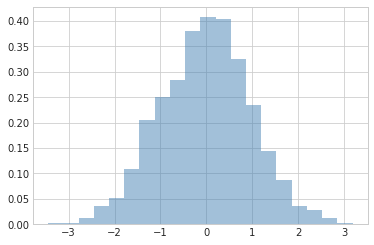

In [8]:
plt.hist(
    data,
    bins=20, 
    normed=True, 
    alpha=0.5,
    histtype='stepfilled', 
    color='steelblue',
    edgecolor='none'
);

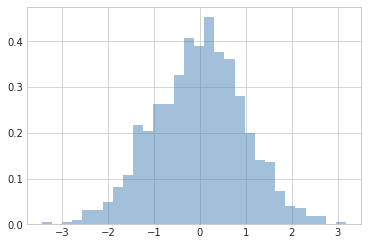

In [9]:
plt.hist(
    data,
    bins=30, 
    normed=True, 
    alpha=0.5,
    histtype='stepfilled', 
    color='steelblue',
    edgecolor='none'
);

다양한 분포에 대한 히스토그램을 비교할 때는...

histtype='stepfilled'와 투명도 alpha를 결합하면 유용하다.

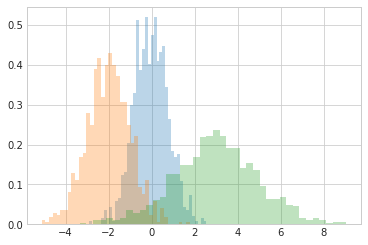

In [14]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(
    histtype='stepfilled',
    alpha=0.3,
    normed=True,
    bins=40
)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.show()

히스토그램을 계산만 하고 표시할 생각이 없다면(특정 구간에 해당하는 점의 개수를 세고 싶다면) np.histogram() 사용

In [16]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 18 204 489 263  26]


### 2차원 히스토그램과 구간화

- 2차원에서도 히스토그램 가능
- 다변량 가우스 분포를 띄는 x와 y를 이용할 거임

In [17]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]

x, y = np.random.multivariate_normal(mean, cov, 10000).T

### plt.hist2d

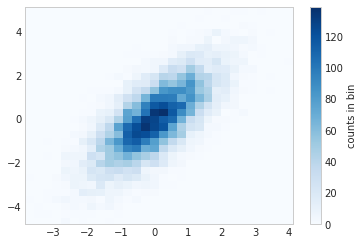

In [20]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

### plt.hexbin : 육각형 구간화

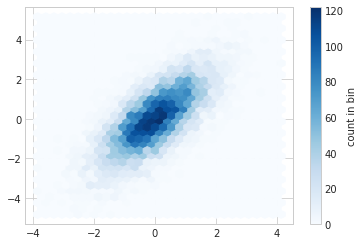

In [21]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Kernel density estimation

Another common method of evaluating densities in multiple dimensions is *kernel density estimation* (KDE).
This will be discussed more fully in [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb), but for now we'll simply mention that KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.
One extremely quick and simple KDE implementation exists in the ``scipy.stats`` package.
Here is a quick example of using the KDE on this data:

KDE
- kernel density estimation
- 커널 밀도 추정
- 간단하게 생각하면 공간상의 점들을 문질러서 그 결과로 부드러운 함수를 얻는 방식
- scipy.stats으로 쉽게 구현 가능
- seaborn으로 하면 더 쉬우니 여기는 그냥 참고만 하자

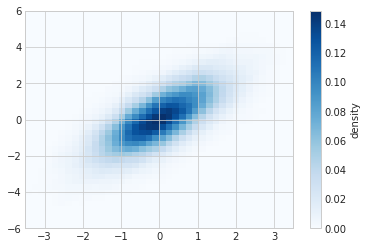

In [24]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")